In [2]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [4]:
# TABLE ONLY
import numpy as np
from scipy.stats import ttest_ind
from tabulate import tabulate

# Sample data
ans_male_scores = [92.2,95.3,82.8,92.2,89.1,89.1,1.6,73.4,95.3,92.2,87.5,92.2]
ans_female_scores = [98.4,90.6,1.56,95.3,82.8,96.9,96.9,89.1,0,84.4,95.3,89.1,95.3,96.9,80,93.8,89.1,95.3]

memory_male_scores = [60, 0, 20, 40, 60, 40, 60, 40, 20]
memory_female_scores = [40, 20, 100, 80, 60, 100, 40, 100, 80, 0, 60, 40, 40, 80, 100]

spatial_mapping_male_scores = [79.95, 95, 100, 95, 90, 100, 100]
spatial_mapping_female_scores = [80, 92.5, 77.5, 87.5, 82.5, 92.5, 87.5, 82.5, 95, 80, 95, 65, 85, 100]

maths_male_scores = [60, 50, 77.8, 60, 81.8, 66.7, 77.8, 77.8, 70, 80]
maths_female_scores = [72.7, 88.9, 55.6, 70, 85.7, 80, 55.6, 66.7, 90.9, 80, 77.8, 55.6, 62.5, 60, 77.8, 80, 66.8, 70]


# Calculate T-test
def perform_t_test(male_scores, female_scores):
    t_statistic, p_value = ttest_ind(male_scores, female_scores)
    return t_statistic, p_value

# Calculate results 
ans_results = perform_t_test(ans_male_scores, ans_female_scores)
memory_results = perform_t_test(memory_male_scores, memory_female_scores)
spatial_mapping_results = perform_t_test(spatial_mapping_male_scores, spatial_mapping_female_scores)
maths_results = perform_t_test(maths_male_scores, maths_female_scores)


tests = ['ANS Test', 'Memory Test', 'Spatial Mapping', 'Maths Test']
male_stats = [np.mean(ans_male_scores), np.mean(memory_male_scores), np.mean(spatial_mapping_male_scores), np.mean(maths_male_scores)]
male_se = [np.std(ans_male_scores) / np.sqrt(len(ans_male_scores)),
            np.std(memory_male_scores) / np.sqrt(len(memory_male_scores)),
            np.std(spatial_mapping_male_scores) / np.sqrt(len(spatial_mapping_male_scores)),
            np.std(maths_male_scores) / np.sqrt(len(maths_male_scores))]

female_stats = [np.mean(ans_female_scores), np.mean(memory_female_scores), np.mean(spatial_mapping_female_scores), np.mean(maths_female_scores)]
female_se = [np.std(ans_female_scores) / np.sqrt(len(ans_female_scores)),
              np.std(memory_female_scores) / np.sqrt(len(memory_female_scores)),
              np.std(spatial_mapping_female_scores) / np.sqrt(len(spatial_mapping_female_scores)),
              np.std(maths_female_scores) / np.sqrt(len(maths_female_scores))]

diff_scores = [m - f for m, f in zip(male_stats, female_stats)]
t_statistics = [ans_results[0], memory_results[0], spatial_mapping_results[0], maths_results[0]]
p_values = [ans_results[1], memory_results[1], spatial_mapping_results[1], maths_results[1]]

# Create my table
table_data = list(zip(tests, male_stats, male_se, female_stats, female_se, diff_scores, p_values, t_statistics))
table_headers = ['Test', 'Mean Male Score', 'SE Male Score', 'Mean Female Score', 'SE Female Score', 'Difference in Score', 'P-value', 'T-statistic']
table = tabulate(table_data, headers=table_headers, tablefmt='grid')


# Print my table
print(table)


+-----------------+-------------------+-----------------+---------------------+-------------------+-----------------------+-----------+---------------+
| Test            |   Mean Male Score |   SE Male Score |   Mean Female Score |   SE Female Score |   Difference in Score |   P-value |   T-statistic |
+=================+===================+=================+=====================+===================+=======================+===========+===============+
| ANS Test        |           81.9083 |         7.18779 |             81.7089 |           6.8517  |              0.199444 | 0.985121  |     0.0188162 |
+-----------------+-------------------+-----------------+---------------------+-------------------+-----------------------+-----------+---------------+
| Memory Test     |           37.7778 |         6.62539 |             62.6667 |           7.97032 |            -24.8889   | 0.0501498 |    -2.07239   |
+-----------------+-------------------+-----------------+---------------------+---------

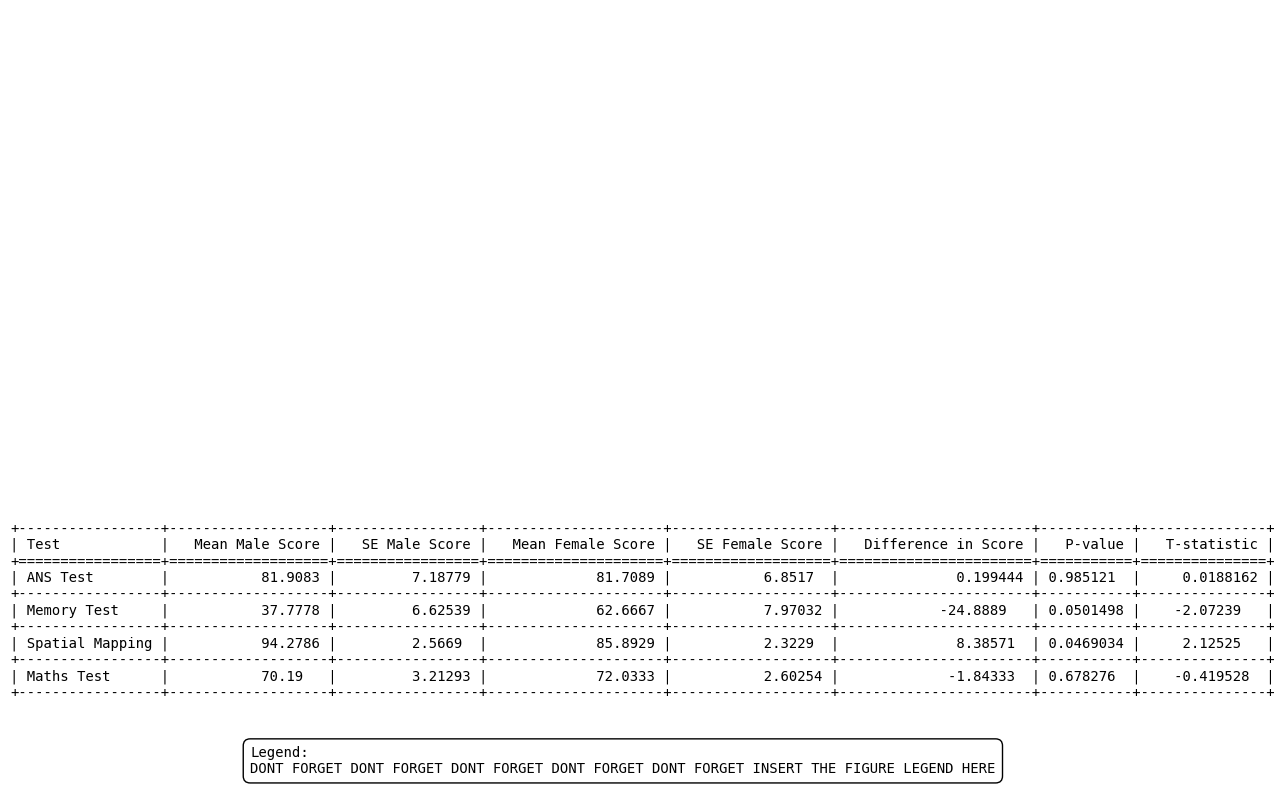

In [3]:
# TABLE AND FIGURE LEGEND
import numpy as np
from scipy.stats import ttest_ind
from tabulate import tabulate
import matplotlib.pyplot as plt  # Add this import statement

# Sample data
ans_male_scores = [92.2,95.3,82.8,92.2,89.1,89.1,1.6,73.4,95.3,92.2,87.5,92.2]
ans_female_scores = [98.4,90.6,1.56,95.3,82.8,96.9,96.9,89.1,0,84.4,95.3,89.1,95.3,96.9,80,93.8,89.1,95.3]

memory_male_scores = [60, 0, 20, 40, 60, 40, 60, 40, 20]
memory_female_scores = [40, 20, 100, 80, 60, 100, 40, 100, 80, 0, 60, 40, 40, 80, 100]

spatial_mapping_male_scores = [79.95, 95, 100, 95, 90, 100, 100]
spatial_mapping_female_scores = [80, 92.5, 77.5, 87.5, 82.5, 92.5, 87.5, 82.5, 95, 80, 95, 65, 85, 100]

maths_male_scores = [60, 50, 77.8, 60, 81.8, 66.7, 77.8, 77.8, 70, 80]
maths_female_scores = [72.7, 88.9, 55.6, 70, 85.7, 80, 55.6, 66.7, 90.9, 80, 77.8, 55.6, 62.5, 60, 77.8, 80, 66.8, 70]

# Calculate T-test
def perform_t_test(male_scores, female_scores):
    t_statistic, p_value = ttest_ind(male_scores, female_scores)
    return t_statistic, p_value

# Calculate results 
ans_results = perform_t_test(ans_male_scores, ans_female_scores)
memory_results = perform_t_test(memory_male_scores, memory_female_scores)
spatial_mapping_results = perform_t_test(spatial_mapping_male_scores, spatial_mapping_female_scores)
maths_results = perform_t_test(maths_male_scores, maths_female_scores)

tests = ['ANS Test', 'Memory Test', 'Spatial Mapping', 'Maths Test']
male_stats = [np.mean(ans_male_scores), np.mean(memory_male_scores), np.mean(spatial_mapping_male_scores), np.mean(maths_male_scores)]
male_se = [np.std(ans_male_scores) / np.sqrt(len(ans_male_scores)),
            np.std(memory_male_scores) / np.sqrt(len(memory_male_scores)),
            np.std(spatial_mapping_male_scores) / np.sqrt(len(spatial_mapping_male_scores)),
            np.std(maths_male_scores) / np.sqrt(len(maths_male_scores))]

female_stats = [np.mean(ans_female_scores), np.mean(memory_female_scores), np.mean(spatial_mapping_female_scores), np.mean(maths_female_scores)]
female_se = [np.std(ans_female_scores) / np.sqrt(len(ans_female_scores)),
              np.std(memory_female_scores) / np.sqrt(len(memory_female_scores)),
              np.std(spatial_mapping_female_scores) / np.sqrt(len(spatial_mapping_female_scores)),
              np.std(maths_female_scores) / np.sqrt(len(maths_female_scores))]

diff_scores = [m - f for m, f in zip(male_stats, female_stats)]
t_statistics = [ans_results[0], memory_results[0], spatial_mapping_results[0], maths_results[0]]
p_values = [ans_results[1], memory_results[1], spatial_mapping_results[1], maths_results[1]]

table_data = list(zip(tests, male_stats, male_se, female_stats, female_se, diff_scores, p_values, t_statistics))
table_headers = ['Test', 'Mean Male Score', 'SE Male Score', 'Mean Female Score', 'SE Female Score', 'Difference in Score', 'P-value', 'T-statistic']
table = tabulate(table_data, headers=table_headers, tablefmt='grid')


fig, ax = plt.subplots(figsize=(10, 8))


ax.axis('off')
ax.text(0, 0, table, va='center', ha='left', fontfamily='monospace')

# Add figure legend text box
legend_text = (
    "Legend:\n"
    "DONT FORGET DONT FORGET DONT FORGET DONT FORGET DONT FORGET "
    "INSERT"
    " THE"
    " FIGURE"
    " LEGEND"
    " HERE"
)

ax.text(0.5, -0.25, legend_text, va='center', ha='left', fontfamily='monospace', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()
